In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import optperfprofpy

In [640]:
def compute_step_area(y, x, prestep=True):
    area = 0.0
    for j in range(1, len(x)):
        width = x[j] - x[j-1]
        height = y[j] if prestep else y[j-1]
        area += width * height
    return area

def draw_shaded_perfprof(taus, solver_vals, solvers):
    """Shaded step plotter for performance profiles with AUPP

    Parameters
    ----------
    taus : numpy.ndarray
        x values of plot.
    solver_vals : numpy.ndarray
        y values of plot.
    solvers : list
        Labels of curves.
    """
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # Add lines individually to support labels
    aupps = []
    solver_order = []
    for i, solver in enumerate(solvers):
        aupp = compute_step_area(solver_vals[i, :], taus)
        aupps.append(aupp)
        solver_order.append(solver)
        
        ax.fill_between(
            x=taus, 
            y1=solver_vals[i, :],
            step="pre",
            alpha=0.1)

        ax.step(taus, solver_vals[i, :], 
            label=f"{solver}: {aupp:.2f}", linewidth=5, alpha=0.5)
        
    plt.legend(loc=4)
    plt.xlim(taus.min(), taus.max())
    ax.set_xlabel(r"$\tau$")
    ax.set_ylabel(r"$\rho_s(\tau)$")
    
    plt.plot()

    return aupps, solver_order

Number of problems per solver:  3


,problem,method,obj
0,1,A,1.0
1,1,B,10.0
2,2,A,5.0
3,2,B,1.0
4,3,A,7.5
5,3,B,1.0


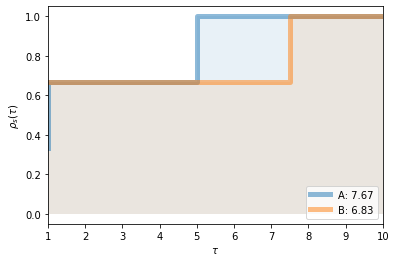

In [641]:
M = 1

problems = pd.Series([1, 1, 2, 2, 3, 3], dtype=int, name='problem')
methods = pd.Series(['A', 'B', 'A', 'B', 'A', 'B'], dtype=str, name='method')
objective_vals = pd.Series([2, 20*M, 25, 5*M, 30, 4*M], dtype=float, name='obj')

example_df = pd.DataFrame([problems, methods, objective_vals]).T
taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    example_df, ['problem'], ['obj'], ['method'])

taus = np.array(taus, dtype=float)
solver_vals = np.array(solver_vals, dtype=float)

draw_shaded_perfprof(taus, solver_vals, solvers)
transformed_data


## AUPP with our results against the XGBoost Baseline

In [ ]:
n_probs = 10
n_methods = 2

problems_array = np.repeat(np.arange(n_probs), 2)
methods = ["Our results", "XGBoost"]
method_labels = methods * n_probs
r0 = np.array([0.11116418987512589, 0.6823, 0.09863429438543247, 0.500124, 0.8910001685812682, 0.3509977818665262, 1.315365, 0.003331658896058798, 0.05247500000000005, 0.973802])
r1 = np.array([0.284792,            0.9660, 0.210926,            0.468936, 0.539995,           0.499239,           0.260695, 0.005529,             0.068560,            0.963624])

simulated_obj_vals = np.vstack([r0, r1]).T.reshape(-1)

problems = pd.Series(problems_array, dtype=int, name='problem')
methods = pd.Series(method_labels, dtype=str, name='method')
objective_vals = pd.Series(simulated_obj_vals, dtype=float, name='obj')

df = pd.DataFrame([problems, methods, objective_vals]).T
taus, solver_vals, solvers, transformed_data = optperfprofpy.calc_perprof(
    df, ['problem'], ['obj'], ['method'])

taus = np.array(taus, dtype=float)
solver_vals = np.array(solver_vals, dtype=float)

draw_shaded_perfprof(taus, solver_vals, solvers)